In [1]:
import og_gd
import og_fista
import og_ista
import jax_gd
import jax_ista
import jax_ista_sparse
import pytorch_gd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import time

import jax
#jax.config.update("jax_platform_name", "cpu")
jax.config.update("jax_platform_name", "gpu")


#import matplotlib
#matplotlib.use("pgf")
#matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    'font.family': 'serif',
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})

In [2]:
start = time.time()
n_iter = 1600
#err_approx, cv_err, runtime = jax_gd.run_sim(250, 20, n_iter=n_iter)
err_approx, runtime, supports, params = jax_ista_sparse.run_sim(200, 100, n_iter=n_iter, lbd_v=1e-3)
print(err_approx.keys())
end = time.time()
print(end - start)

dict_keys(['IACV', 'IACV sparse', 'NS', 'IJ', 'hat'])
379.296443939209


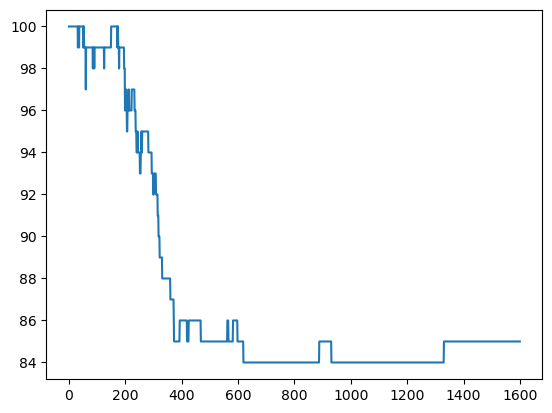

In [3]:
sup_sizes = list(map(len, supports))
plt.plot(sup_sizes)

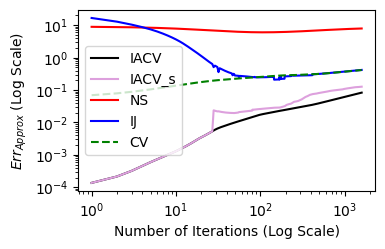

In [4]:
fig, ax = plt.subplots()
start_offset = 5
xx = np.arange(1, n_iter - start_offset + 1)
ax.plot(xx, err_approx['IACV'][start_offset:], c='black', label='IACV')
ax.plot(xx, err_approx['IACV sparse'][start_offset:], c='plum', label='IACV_s')
ax.plot(xx, err_approx['NS'][start_offset:], c='red', label='NS')
ax.plot(xx, err_approx['IJ'][start_offset:], c='blue', label='IJ')
ax.plot(xx, err_approx['hat'][start_offset:], c='green', linestyle='dashed', label='CV')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of Iterations (Log Scale)')
ax.set_ylabel('$Err_{Approx}$ (Log Scale)')
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.tight_layout()
plt.show()
#plt.savefig('err_approx_250.pgf', bbox_inches='tight', pad_inches=0)

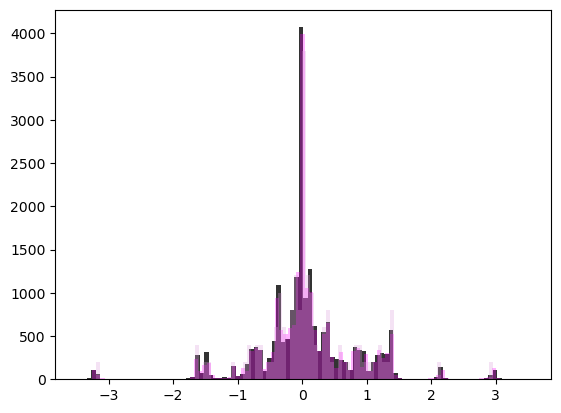

In [5]:
plt.hist(np.asarray(params["true"]).ravel(), bins=100, alpha=0.8, color='black')
plt.hist(params["IACV"].ravel(), bins=100, alpha=0.3, color='magenta')
plt.hist(params["IJ"].ravel(), bins=100, alpha=0.3, color='plum')
#plt.ylim(0, 400)
plt.show()

In [6]:
print(np.mean(np.asarray(params["true"])))
print(np.mean(params["IACV"]))
print(np.mean(params["IJ"]))

0.068308316
0.06796892
0.070996046


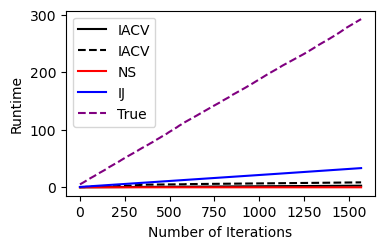

In [7]:
fig, ax = plt.subplots()
start_offset = 30
ax.plot(runtime['IACV'][start_offset:], c='black', label='IACV')
ax.plot(runtime['IACV sparse'][start_offset:], c='black', linestyle='dashed', label='IACV')
ax.plot(runtime['NS'][start_offset:], c='red', label='NS')
ax.plot(runtime['IJ'][start_offset:], c='blue', label='IJ')
ax.plot(runtime['true'][start_offset:], c='purple', label='True', linestyle='dashed')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Runtime')
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.tight_layout()
plt.show()
#plt.savefig('true_runtime.pgf', bbox_inches='tight', pad_inches=0)

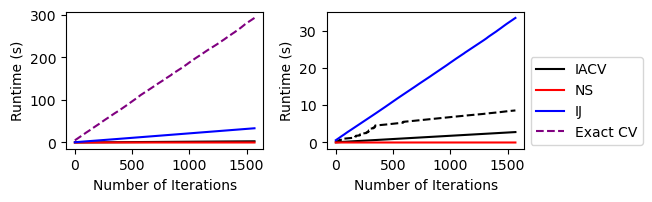

In [8]:
fig, ax = plt.subplots(1, 2)
start_offset = 30
ax[0].plot(runtime['IACV'][start_offset:], c='black', label='IACV')
ax[0].plot(runtime['NS'][start_offset:], c='red', label='NS')
ax[0].plot(runtime['IJ'][start_offset:], c='blue', label='IJ')
ax[0].plot(runtime['true'][start_offset:], c='purple', label='Exact CV', linestyle='dashed')
ax[0].set_xlabel('Number of Iterations')
ax[0].set_ylabel('Runtime (s)')
#ax[0].legend()
ax[1].plot(runtime['IACV'][start_offset:], c='black', label='IACV')
ax[1].plot(runtime['IACV sparse'][start_offset:], c='black', linestyle='dashed', label='IACV')
ax[1].plot(runtime['IJ'][start_offset:], c='blue', label='IJ')
ax[1].plot(runtime['NS'][start_offset:], c='red', label='NS')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Runtime (s)')
#ax[1].legend()
#ax.legend()
ws = 1.05 # 1.75
hs = 1.65 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
fig.legend(["IACV", "NS", "IJ", "Exact CV"], loc="outside center right", bbox_to_anchor=(1.2, 0.5))
plt.tight_layout()
plt.show()
#plt.savefig('combined_runtime.pgf', bbox_inches='tight', pad_inches=0)

## markerline, _, _ = plt.stem(theta, label="$\\theta_{IACV}$", linefmt='black', markerfmt='D')
markerline.set_markerfacecolor('none')
plt.stem(theta_star, label="$\\theta^*$")
plt.legend()